## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

## Data 

In [2]:
random1 = pd.read_csv("random_1_0.csv")
random2 = pd.read_csv("random_2_0.csv")
# random1.head()
# random2.head()
# can ignore the iteration column

## Functions

In [3]:
def list_by_list_condition(df, col, condition_col, logic):
    return df.loc[df[condition_col] == logic, col]

def mean_of(ser):
    return np.mean(ser, 0)

def stddev_of(ser):
    return np.std(ser, 0)

def how_many_cancelled(df, logic=True):
    return len(list_by_list_condition(df, 'elapsed_time', 'cancelled', logic))

def bar_ize(ser, n):
    if len(ser) < n:
        raise Exception("n > length ")
    container_ceils = np.linspace(ser.min(), ser.max(), n)
    containers = np.zeros_like(container_ceils)
    for idx, i in enumerate(ser):
        x = np.greater(container_ceils, i)
        if len(np.argwhere(x == True)) > 0:
            containers[np.argwhere(x == True)[0][0]] += 1
        else:
            containers[-1] += 1
    return containers

def get_samples(ser, start, n):
    return ser.iloc[start:start+n]

def calculate_clt(ser, samplesize):
    means = []
    for i in range(int(len(ser)/samplesize)):
        means.append(mean_of(get_samples(ser, i*samplesize, samplesize)))
    return means 


## STATs

In [4]:
print(
    f" \
    Algorithm 1:\n \
    trials cancelled: {how_many_cancelled(random1)}/{len(random1)}\n \
    Times: ({mean_of(list_by_list_condition(random1, 'elapsed_time', 'cancelled', False))}, {stddev_of(list_by_list_condition(random1, 'elapsed_time', 'cancelled', False))})\n \
    Distances: ({mean_of(list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False))},{stddev_of(list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False))})\n \
    Angles: ({mean_of(list_by_list_condition(random1, 'aggregated_angle', 'cancelled', False))}, {stddev_of(list_by_list_condition(random1, 'aggregated_angle', 'cancelled', False))}) \
    Accr: ({mean_of(list_by_list_condition(random1, 'goal_accuracy', 'cancelled', False))}, {stddev_of(list_by_list_condition(random1, 'goal_accuracy', 'cancelled', False))}) \
    "
)
print()
print(
    f" \
    Algorithm 2:\n \
    trials cancelled: {how_many_cancelled(random2)}/{len(random2)}\n \
    Times: ({mean_of(list_by_list_condition(random2, 'elapsed_time', 'cancelled', False))}, {stddev_of(list_by_list_condition(random2, 'elapsed_time', 'cancelled', False))})\n \
    Distances: ({mean_of(list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False))},{stddev_of(list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False))})\n \
    Angles: ({mean_of(list_by_list_condition(random2, 'aggregated_angle', 'cancelled', False))}, {stddev_of(list_by_list_condition(random2, 'aggregated_angle', 'cancelled', False))}) \
    Accr: ({mean_of(list_by_list_condition(random2, 'goal_accuracy', 'cancelled', False))}, {stddev_of(list_by_list_condition(random2, 'goal_accuracy', 'cancelled', False))}) \
    "
)

     Algorithm 1:
     trials cancelled: 71/300
     Times: (41.92886462882095, 33.94358205763017)
     Distances: (12.715257033830989,9.650888696256716)
     Angles: (5.303490706242531, 4.0319329388378975)     Accr: (0.4959668069710314, 0.021933199140432513)     

     Algorithm 2:
     trials cancelled: 84/300
     Times: (40.623472222222226, 33.73306654043553)
     Distances: (13.46024658966687,10.253536976758106)
     Angles: (4.8946907011189795, 3.535709262408007)     Accr: (0.5136518861950778, 0.26940248052928506)     


In [5]:
(300-71)/300*100

76.33333333333333

In [6]:
(300-84)/300*100

72.0

## Plots

### Time algo 1 and 2

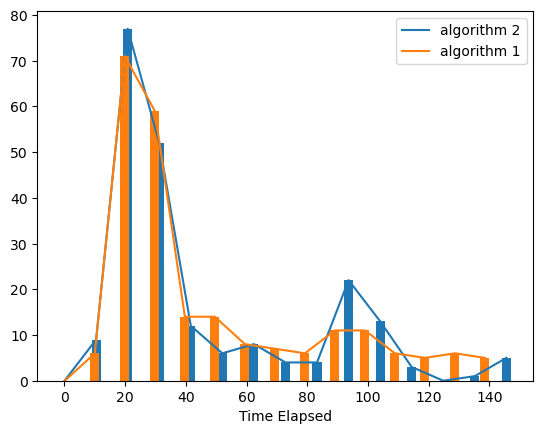

In [65]:
random2_not_cancelled_times = list_by_list_condition(random2, 'elapsed_time', 'cancelled', False)
n_bar = 15
xs = np.linspace(random2_not_cancelled_times.min(), random2_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random2_not_cancelled_times, n_bar), 3)
plt.plot(xs, bar_ize(random2_not_cancelled_times, n_bar), label='algorithm 2')
random1_not_cancelled_times = list_by_list_condition(random1, 'elapsed_time', 'cancelled', False)
xs = np.linspace(random1_not_cancelled_times.min(), random1_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random1_not_cancelled_times, n_bar), 3)
plt.plot(xs, bar_ize(random1_not_cancelled_times, n_bar), label='algorithm 1')
plt.xlabel('Time Elapsed')
plt.legend()
plt.show()

### Distance algo 1 and 2

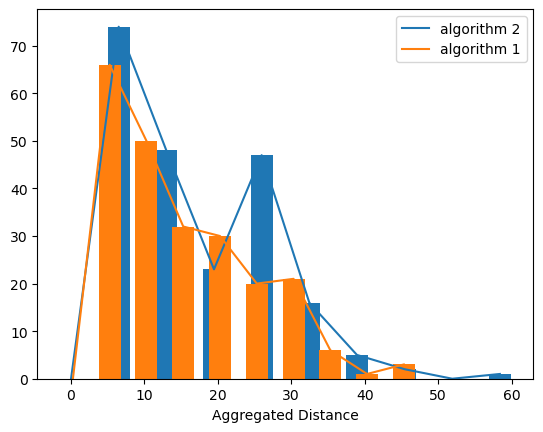

In [66]:
random2_not_cancelled_times = list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False)
n_bar = 10
xs = np.linspace(random2_not_cancelled_times.min(), random2_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random2_not_cancelled_times, n_bar), 3)
plt.plot(xs, bar_ize(random2_not_cancelled_times, n_bar), label='algorithm 2')
random1_not_cancelled_times = list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False)
xs = np.linspace(random1_not_cancelled_times.min(), random1_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random1_not_cancelled_times, n_bar), 3)
plt.plot(xs, bar_ize(random1_not_cancelled_times, n_bar), label='algorithm 1')
plt.xlabel('Aggregated Distance')
plt.legend()
plt.show()

### Angle algo 1 and 2

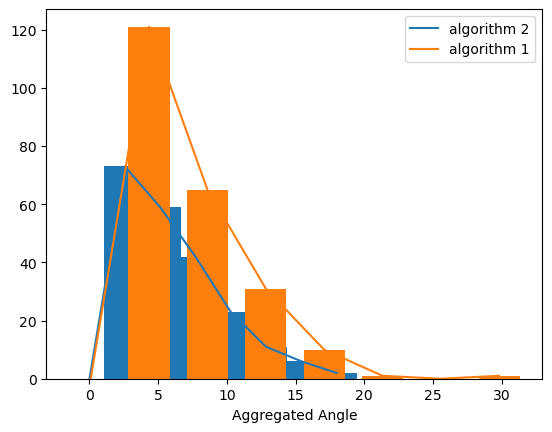

In [67]:
random2_not_cancelled_times = list_by_list_condition(random2, 'aggregated_angle', 'cancelled', False)
n_bar = 8
xs = np.linspace(random2_not_cancelled_times.min(), random2_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random2_not_cancelled_times, n_bar), 3)
plt.plot(xs, bar_ize(random2_not_cancelled_times, n_bar), label='algorithm 2')
random1_not_cancelled_times = list_by_list_condition(random1, 'aggregated_angle', 'cancelled', False)
xs = np.linspace(random1_not_cancelled_times.min(), random1_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random1_not_cancelled_times, n_bar), 3)
plt.plot(xs, bar_ize(random1_not_cancelled_times, n_bar), label='algorithm 1')
plt.xlabel('Aggregated Angle')
plt.legend()
plt.show()

### goalaccr algo 1 and 2

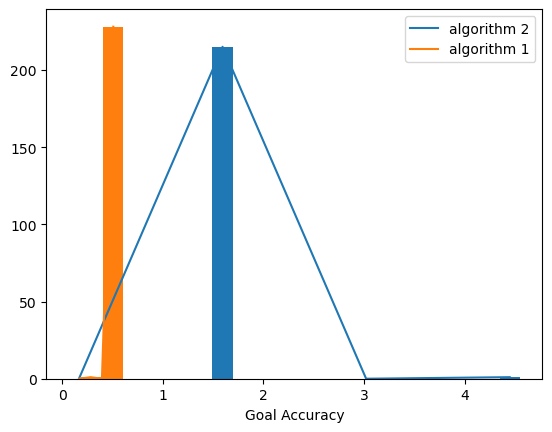

In [72]:
random2_not_cancelled_times = list_by_list_condition(random2, 'goal_accuracy', 'cancelled', False)
n_bar = 4
xs = np.linspace(random2_not_cancelled_times.min(), random2_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random2_not_cancelled_times, n_bar), 0.2)
plt.plot(xs, bar_ize(random2_not_cancelled_times, n_bar), label='algorithm 2')
random1_not_cancelled_times = list_by_list_condition(random1, 'goal_accuracy', 'cancelled', False)
xs = np.linspace(random1_not_cancelled_times.min(), random1_not_cancelled_times.max(), n_bar)
plt.bar(xs, bar_ize(random1_not_cancelled_times, n_bar), 0.2)
plt.plot(xs, bar_ize(random1_not_cancelled_times, n_bar), label='algorithm 1')
plt.xlabel('Goal Accuracy')
plt.legend()
plt.show()

## Chi-Squared on Cancelled

In [77]:
data = pd.DataFrame({
    'failed': [how_many_cancelled(random1, True), how_many_cancelled(random2, True)],
    'passed': [how_many_cancelled(random1, False), how_many_cancelled(random2, False)]
}, index=['Algorithm Left', 'Algorithm Right'])

chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", pd.DataFrame(expected, index=data.index, columns=data.columns))


Chi2 Statistic: 1.2526
p-value: 0.2631
Degrees of freedom: 1
Expected frequencies:
                  failed  passed
Algorithm Left     77.5   222.5
Algorithm Right    77.5   222.5


✅ 1. Null Hypothesis (H₀):
There is no association between the algorithm used (Left or Right) and the outcome (failed or passed). In other words, the pass/fail rate is independent of the algorithm.

📊 2. Observed vs. Expected:
You observed a difference in failure/pass rates between the two algorithms.

But the expected frequencies (if the null hypothesis were true) are:

77.5 failed / 222.5 passed for each algorithm.

That means, under independence, both algorithms would behave the same.

📉 3. Chi2 Statistic = 1.2526:
This value tells us how much the observed data deviates from the expected.

A small value (like < 3.84 for df=1) typically means "not enough deviation" to reject the null hypothesis.

🔢 4. p-value = 0.3304:
This is much higher than 0.05, the typical threshold.

You fail to reject the null hypothesis.

There's no statistically significant difference in the failure/pass distribution between Algorithm Left and Right.

🧠 Final Conclusion:
There is no significant evidence to suggest that Algorithm Left and Algorithm Right perform differently in terms of failure or success. The differences you observed are likely due to random chance.

Your Chi-Square Test Results:
Failed	Passed	Total
Algorithm Left	observed	observed	
Algorithm Right	observed	observed	
Expected (both)	77.5	222.5	

Chi² statistic: 1.2526

p-value: 0.2631

Degrees of freedom (df): 1

Expected frequencies: both algorithms are expected to fail/pass at the same rates (under the null hypothesis).

🧠 What the Test Does:
The null hypothesis (H₀) is:

The outcome (pass/fail) is independent of the algorithm used (Left or Right).

The alternative hypothesis (H₁) is:

The outcome is dependent on the algorithm — i.e., the algorithm makes a difference in success/failure rates.

🔍 Interpretation:
1. p-value = 0.2631
This means there is a 26.31% chance that the differences in pass/fail counts happened by random chance under the null hypothesis.

Since this is greater than 0.05, we do not reject the null hypothesis.

✅ Conclusion: There's no statistically significant association between the algorithm used and whether the trial failed or passed.

2. Chi² statistic = 1.2526
This is the measure of how different the observed frequencies are from the expected frequencies (which assume no relationship). A value of 1.25 is low, which supports the conclusion: no strong deviation from expected.

3. Degrees of Freedom = 1
This is correct for a 2x2 contingency table:

𝑑
𝑓
=
(
𝑟
𝑜
𝑤
𝑠
−
1
)
×
(
𝑐
𝑜
𝑙
𝑢
𝑚
𝑛
𝑠
−
1
)
=
(
2
−
1
)
×
(
2
−
1
)
=
1
df=(rows−1)×(columns−1)=(2−1)×(2−1)=1
✅ Summary (in your robotics experiment):
Test type: Chi-square test of independence

Question: Does the choice of algorithm affect pass/fail outcomes?

Answer: No statistically significant effect — pass/fail outcomes are likely independent of algorithm used.

Caveat: This assumes sample size is large enough and no expected cell is < 5 (which yours isn't — 77.5 is fine).

## LILLIFORS

In [78]:
from statsmodels.stats.diagnostic import lilliefors

In [80]:
stat_A, pval_A = lilliefors(list_by_list_condition(random1, 'elapsed_time', 'cancelled', False))
stat_B, pval_B = lilliefors(list_by_list_condition(random2, 'elapsed_time', 'cancelled', False))
print("Time: ")
print(f"Algorithm A: statistic = {stat_A:.4f}, p-value = {pval_A:.4f}")
print(f"Algorithm B: statistic = {stat_B:.4f}, p-value = {pval_B:.4f}")

stat_A, pval_A = lilliefors(list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False))
stat_B, pval_B = lilliefors(list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False))
print("Distance: ")
print(f"Algorithm A: statistic = {stat_A:.4f}, p-value = {pval_A:.4f}")
print(f"Algorithm B: statistic = {stat_B:.4f}, p-value = {pval_B:.4f}")

stat_A, pval_A = lilliefors(list_by_list_condition(random1, 'aggregated_angle', 'cancelled', False))
stat_B, pval_B = lilliefors(list_by_list_condition(random2, 'aggregated_angle', 'cancelled', False))
print("Angle: ")
print(f"Algorithm A: statistic = {stat_A:.4f}, p-value = {pval_A:.4f}")
print(f"Algorithm B: statistic = {stat_B:.4f}, p-value = {pval_B:.4f}")

Time: 
Algorithm A: statistic = 0.2370, p-value = 0.0010
Algorithm B: statistic = 0.2568, p-value = 0.0010
Distance: 
Algorithm A: statistic = 0.1210, p-value = 0.0010
Algorithm B: statistic = 0.1415, p-value = 0.0010
Angle: 
Algorithm A: statistic = 0.1376, p-value = 0.0010
Algorithm B: statistic = 0.1613, p-value = 0.0010


## MANN WHITNEY U TEST

In [73]:
stat, p = mannwhitneyu(random1_not_cancelled_dists, random2_not_cancelled_dists, alternative='two-sided')
print(f"U-statistic = {stat}, p-value = {p}")

U-statistic = 23862.0, p-value = 0.5213403323196804


In [74]:
stat, p = mannwhitneyu(random1_not_cancelled_angle, random2_not_cancelled_angle, alternative='two-sided')
print(f"U-statistic = {stat}, p-value = {p}")

U-statistic = 26018.0, p-value = 0.343082425110694


In [75]:
stat, p = mannwhitneyu(random1_not_cancelled_times, random2_not_cancelled_times, alternative='two-sided')
print(f"U-statistic = {stat}, p-value = {p}")

U-statistic = 25535.0, p-value = 0.5539401171174977


In [76]:
stat, p = mannwhitneyu(random1_not_cancelled_accr, random2_not_cancelled_accr, alternative='two-sided')
print(f"U-statistic = {stat}, p-value = {p}")

U-statistic = 25535.0, p-value = 0.5539401171174977


## CLT DISTANCE

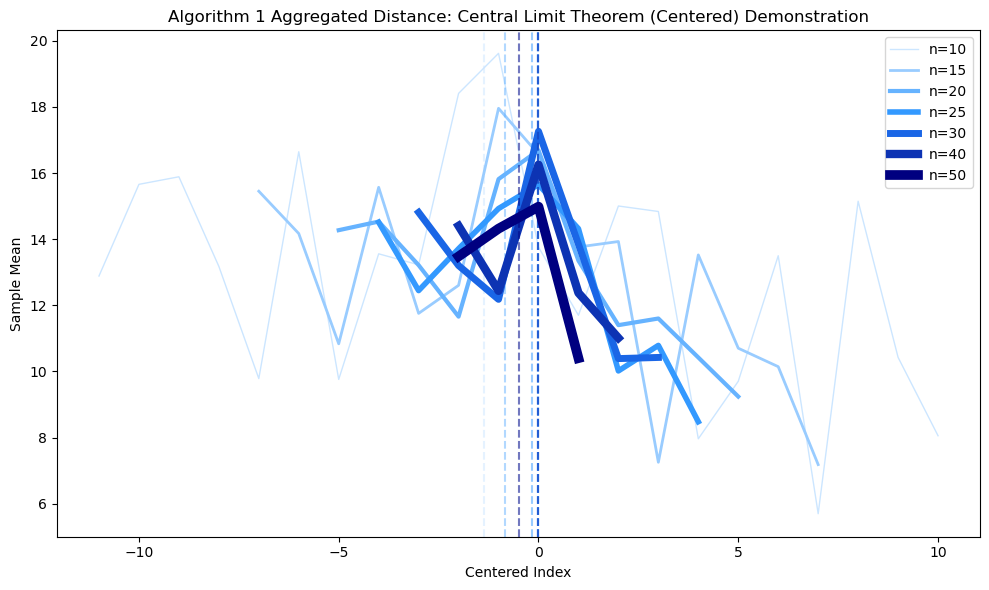

In [ ]:
samplesizes = [10, 15, 20, 25, 30, 40, 50]
clts = [calculate_clt(list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False), x) for x in samplesizes]
colors = [
    (0.8, 0.9, 1.0),
    (0.6, 0.8, 1.0),
    (0.4, 0.7, 1.0),
    (0.2, 0.6, 1.0),
    (0.1, 0.4, 0.9),
    (0.05, 0.2, 0.7),
    (0.0, 0.0, 0.5)
]

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(samplesizes)):
    sample_means = clts[i]
    mean_val = np.mean(sample_means)
    centered_x = np.arange(len(sample_means)) - len(sample_means) // 2
    ax.plot(centered_x, sample_means, label=f'n={samplesizes[i]}', linewidth=i+1, color=colors[i])
    ax.axvline(x=np.median(centered_x), linestyle='--', color=colors[i], alpha=0.5)

ax.set_title("Algorithm 1 Aggregated Distance: Central Limit Theorem (Centered) Demonstration")
ax.set_xlabel("Centered Index")
ax.set_ylabel("Sample Mean")
ax.legend()
plt.tight_layout()
plt.show()


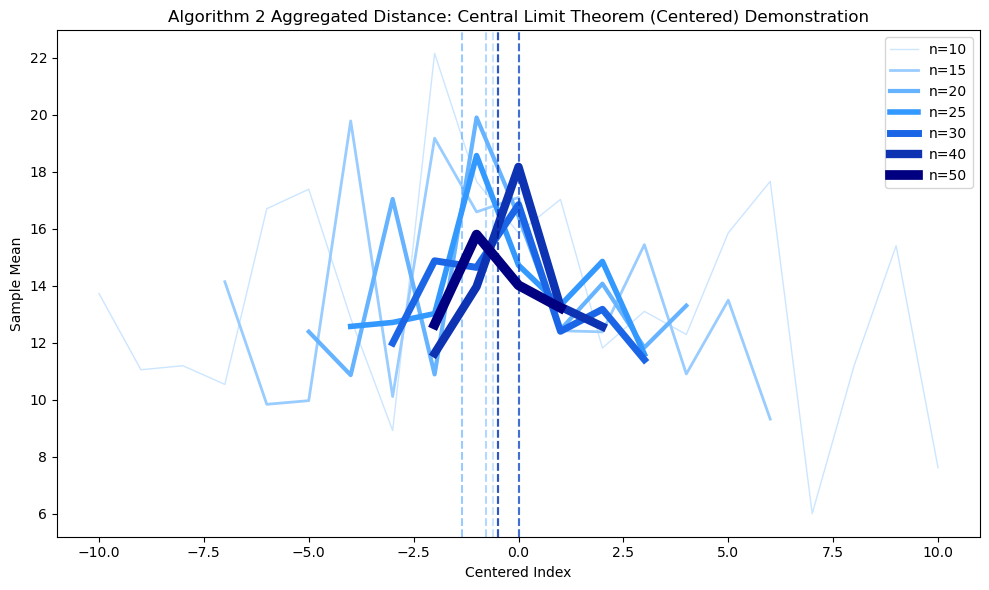

In [ ]:
samplesizes = [10, 15, 20, 25, 30, 40, 50]
clts = [calculate_clt(list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False), x) for x in samplesizes]
colors = [
    (0.8, 0.9, 1.0),
    (0.6, 0.8, 1.0),
    (0.4, 0.7, 1.0),
    (0.2, 0.6, 1.0),
    (0.1, 0.4, 0.9),
    (0.05, 0.2, 0.7),
    (0.0, 0.0, 0.5)
]

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(samplesizes)):
    sample_means = clts[i]
    mean_val = np.mean(sample_means)
    centered_x = np.arange(len(sample_means)) - len(sample_means) // 2
    ax.plot(centered_x, sample_means, label=f'n={samplesizes[i]}', linewidth=i+1, color=colors[i])
    ax.axvline(x=np.median(centered_x), linestyle='--', color=colors[i], alpha=0.5)

ax.set_title("Algorithm 2 Aggregated Distance: Central Limit Theorem (Centered) Demonstration")
ax.set_xlabel("Centered Index")
ax.set_ylabel("Sample Mean")
ax.legend()
plt.tight_layout()
plt.show()


## CLT TIME

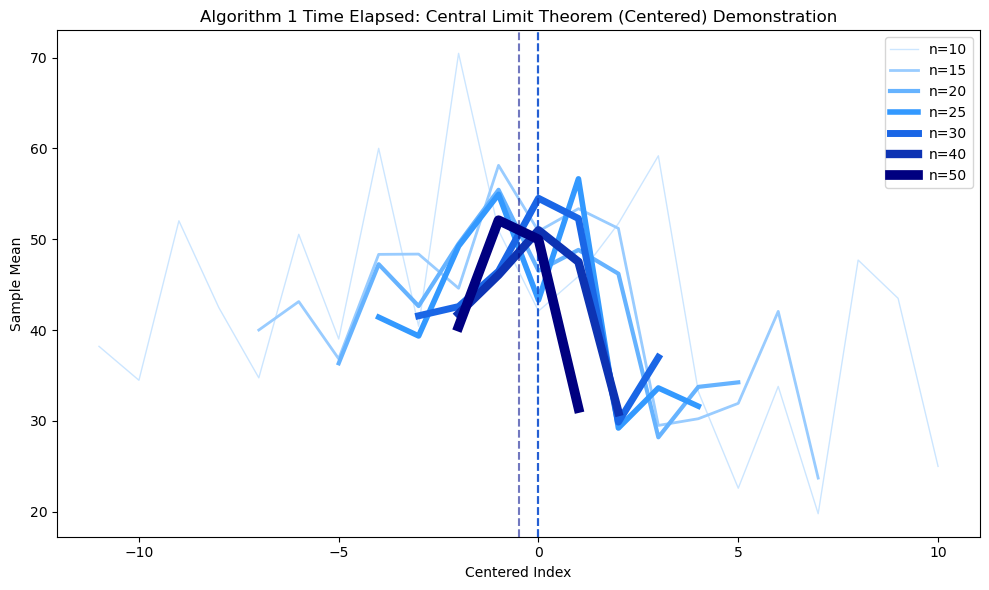

In [62]:
samplesizes = [10, 15, 20, 25, 30, 40, 50]
clts = [calculate_clt(list_by_list_condition(random1, 'elapsed_time', 'cancelled', False), x) for x in samplesizes]
colors = [
    (0.8, 0.9, 1.0),
    (0.6, 0.8, 1.0),
    (0.4, 0.7, 1.0),
    (0.2, 0.6, 1.0),
    (0.1, 0.4, 0.9),
    (0.05, 0.2, 0.7),
    (0.0, 0.0, 0.5)
]

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(samplesizes)):
    sample_means = clts[i]
    mean_val = np.mean(sample_means)
    centered_x = np.arange(len(sample_means)) - len(sample_means) // 2
    ax.plot(centered_x, sample_means, label=f'n={samplesizes[i]}', linewidth=i+1, color=colors[i])
    ax.axvline(x=np.median(centered_x), linestyle='--', color=colors[i], alpha=0.5)

ax.set_title("Algorithm 1 Time Elapsed: Central Limit Theorem (Centered) Demonstration")
ax.set_xlabel("Centered Index")
ax.set_ylabel("Sample Mean")
ax.legend()
plt.tight_layout()
plt.show()

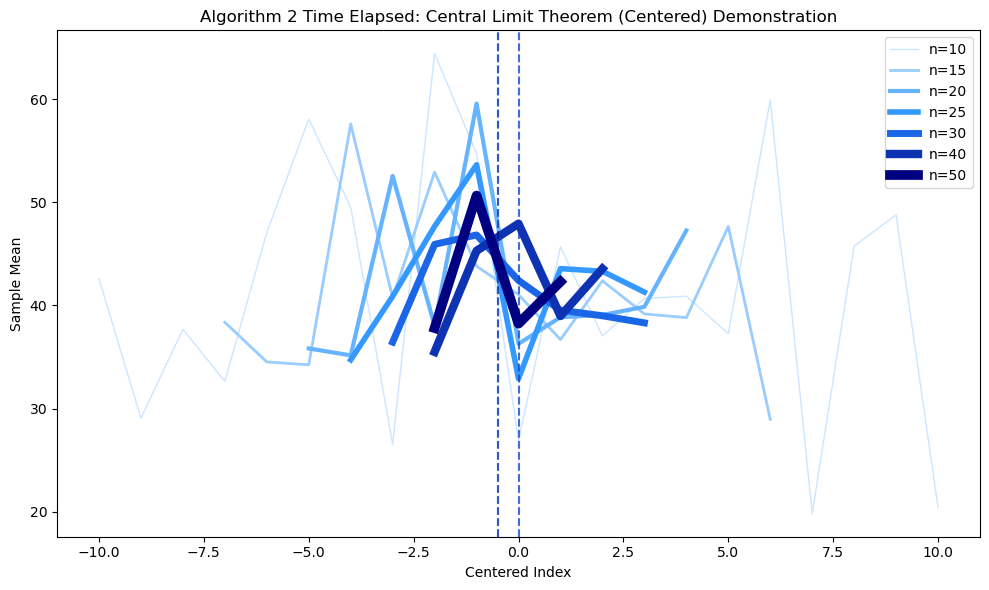

In [ ]:
samplesizes = [10, 15, 20, 25, 30, 40, 50]
clts = [calculate_clt(list_by_list_condition(random2, 'elapsed_time', 'cancelled', False), x) for x in samplesizes]
colors = [
    (0.8, 0.9, 1.0),
    (0.6, 0.8, 1.0),
    (0.4, 0.7, 1.0),
    (0.2, 0.6, 1.0),
    (0.1, 0.4, 0.9),
    (0.05, 0.2, 0.7),
    (0.0, 0.0, 0.5)
]

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(samplesizes)):
    sample_means = clts[i]
    mean_val = np.mean(sample_means)
    centered_x = np.arange(len(sample_means)) - len(sample_means) // 2
    ax.plot(centered_x, sample_means, label=f'n={samplesizes[i]}', linewidth=i+1, color=colors[i])
    ax.axvline(x=np.median(centered_x), linestyle='--', color=colors[i], alpha=0.5)

ax.set_title("Algorithm 2 Time Elapsed: Central Limit Theorem (Centered) Demonstration")
ax.set_xlabel("Centered Index")
ax.set_ylabel("Sample Mean")
ax.legend()
plt.tight_layout()
plt.show()


## STH ELSE

In [7]:
import numpy as np
import pandas as pd 
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

In [13]:
print("switching to dependent datasets")
# random1 = pd.read_csv("random_1_0.csv")
# random2 = pd.read_csv("random_2_0.csv")

df_A = pd.read_csv("random_1_0.csv")
df_B = pd.read_csv("random_2_0.csv")

success_A = df_A[df_A["cancelled"] == False].copy()
success_B = df_B[df_B["cancelled"] == False].copy()

# Create a unique key to align by initial and goal positions
def make_key(df):
    return df[["initial_x", "initial_y", "goal_x", "goal_y"]].round(4).astype(str).agg("_".join, axis=1)

success_A["key"] = make_key(success_A)
success_B["key"] = make_key(success_B)

# Find common successful keys
common_keys = set(success_A["key"]) & set(success_B["key"])

# Filter only those that are matched
paired_A = success_A[success_A["key"].isin(common_keys)].sort_values("key")
paired_B = success_B[success_B["key"].isin(common_keys)].sort_values("key")

# Ensure matching order
assert np.all(paired_A["key"].values == paired_B["key"].values)

# Extract paired metrics
metrics = {
    "Time": (paired_A["elapsed_time"].values, paired_B["elapsed_time"].values),
    "Distance": (paired_A["aggregated_distance"].values, paired_B["aggregated_distance"].values),
    "Angle": (paired_A["aggregated_angle"].values, paired_B["aggregated_angle"].values),
}

# time_A = list_by_list_condition(random1, 'elapsed_time', 'cancelled', False)
# time_B = list_by_list_condition(random2, 'elapsed_time', 'cancelled', False)
# distance_A = list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False)
# distance_B = list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False)
# angle_A = list_by_list_condition(random1, 'aggregated_angle', 'cancelled', False)
# angle_B = list_by_list_condition(random2, 'aggregated_angle', 'cancelled', False)

# metrics = {
#     "Time": (time_A, time_B),
#     "Distance": (distance_A, distance_B),
#     "Angle": (angle_A, angle_B)
# }

# lilliefors
for name, (a, b) in metrics.items():
    stat_a, pval_a = lilliefors(a)
    stat_b, pval_b = lilliefors(b)
    print(f"{name} - Algorithm A: Lilliefors p = {pval_a:.4f}")
    print(f"{name} - Algorithm B: Lilliefors p = {pval_b:.4f}")

print()

print("\n--- Paired Tests ---")
for name, (a, b) in metrics.items():
    print(f"\n{name}")

    t_stat, t_p = stats.ttest_rel(a, b)
    print(f"Paired T-test: t = {t_stat:.4f}, p = {t_p:.4f}")
    
    try:
        w_stat, w_p = stats.wilcoxon(a, b)
        print(f"Wilcoxon: W = {w_stat:.4f}, p = {w_p:.4f}")
    except ValueError as e:
        print(f"Wilcoxon error: {e}")

print()

print("switching to independent datasets")
random1 = pd.read_csv("random1.csv")
random2 = pd.read_csv("random2.csv")

time_A = list_by_list_condition(random1, 'elapsed_time', 'cancelled', False)
time_B = list_by_list_condition(random2, 'elapsed_time', 'cancelled', False)
distance_A = list_by_list_condition(random1, 'aggregated_distance', 'cancelled', False)
distance_B = list_by_list_condition(random2, 'aggregated_distance', 'cancelled', False)
angle_A = list_by_list_condition(random1, 'aggregated_angle', 'cancelled', False)
angle_B = list_by_list_condition(random2, 'aggregated_angle', 'cancelled', False)

metrics = {
    "Time": (time_A, time_B),
    "Distance": (distance_A, distance_B),
    "Angle": (angle_A, angle_B)
}

for name, (a, b) in metrics.items():
    stat_a, pval_a = lilliefors(a)
    stat_b, pval_b = lilliefors(b)
    print(f"{name} - Algorithm A: Lilliefors p = {pval_a:.4f}")
    print(f"{name} - Algorithm B: Lilliefors p = {pval_b:.4f}")

print("\n--- Independent Tests ---")
for name, (a, b) in metrics.items():
    print(f"\n{name}")
    
    t_stat, t_p = stats.ttest_ind(a, b)
    print(f"T-test: t = {t_stat:.4f}, p = {t_p:.4f}")
    
    u_stat, u_p = stats.mannwhitneyu(a, b, alternative='two-sided')
    print(f"Mann–Whitney U: U = {u_stat:.4f}, p = {u_p:.4f}")

switching to dependent datasets
Time - Algorithm A: Lilliefors p = 0.0010
Time - Algorithm B: Lilliefors p = 0.0010
Distance - Algorithm A: Lilliefors p = 0.0010
Distance - Algorithm B: Lilliefors p = 0.0010
Angle - Algorithm A: Lilliefors p = 0.0010
Angle - Algorithm B: Lilliefors p = 0.0010


--- Paired Tests ---

Time
Paired T-test: t = -1.0672, p = 0.2872
Wilcoxon: W = 9946.0000, p = 0.9961

Distance
Paired T-test: t = -2.4868, p = 0.0137
Wilcoxon: W = 8008.0000, p = 0.0170

Angle
Paired T-test: t = 0.2512, p = 0.8019
Wilcoxon: W = 9686.0000, p = 0.7455

switching to independent datasets
Time - Algorithm A: Lilliefors p = 0.0010
Time - Algorithm B: Lilliefors p = 0.0010
Distance - Algorithm A: Lilliefors p = 0.0041
Distance - Algorithm B: Lilliefors p = 0.2591
Angle - Algorithm A: Lilliefors p = 0.0010
Angle - Algorithm B: Lilliefors p = 0.2501

--- Independent Tests ---

Time
T-test: t = -1.3779, p = 0.1703
Mann–Whitney U: U = 2448.0000, p = 0.2232

Distance
T-test: t = -0.9989, p